<a href="https://colab.research.google.com/github/benson85560/yuanta/blob/main/Div_yld_ATC_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime as dt
import time

## **Retrieve Data**

In [ ]:
path = os.getcwd()
print(path)

/content


In [ ]:
# get BTC (7min

symbol = 'USD-Coin'

startTime = '2022-7-1'
endTime = '2022-7-22'
resolution = 60

startTimeStamp = dt.datetime.strptime(startTime, "%Y-%m-%d").timestamp()
endTimeStamp = dt.datetime.strptime(endTime, "%Y-%m-%d").timestamp()
data = []

while True:
    if startTimeStamp < endTimeStamp:
        t1 = startTimeStamp
        t2 = startTimeStamp + resolution*1000

        url = 'https://ftx.com/api/markets/{}/candles?resolution={}&limit=1440&start_time={}&end_time={}'.format(symbol, resolution, t1, t2)
        response = requests.get(url)
        if response.status_code == 200:
            result = response.json()['result'][:-1] #最後一筆會重複
            data += result
        else:
            print('error: {}, {} ~ {}'.format(symbol, t1, t2))

        startTimeStamp += resolution*1000
    else:
        break

data = pd.DataFrame(data)
data.index = pd.to_datetime(data['startTime'])
data = data[['open', 'high', 'low', 'close', 'volume']]
data.to_csv(path + '/{}_USD.csv'.format(symbol.split('_')[0]))

error: USD-Coin, 1656633600.0 ~ 1656693600.0
error: USD-Coin, 1656693600.0 ~ 1656753600.0
error: USD-Coin, 1656753600.0 ~ 1656813600.0
error: USD-Coin, 1656813600.0 ~ 1656873600.0
error: USD-Coin, 1656873600.0 ~ 1656933600.0
error: USD-Coin, 1656933600.0 ~ 1656993600.0
error: USD-Coin, 1656993600.0 ~ 1657053600.0
error: USD-Coin, 1657053600.0 ~ 1657113600.0
error: USD-Coin, 1657113600.0 ~ 1657173600.0
error: USD-Coin, 1657173600.0 ~ 1657233600.0
error: USD-Coin, 1657233600.0 ~ 1657293600.0
error: USD-Coin, 1657293600.0 ~ 1657353600.0
error: USD-Coin, 1657353600.0 ~ 1657413600.0
error: USD-Coin, 1657413600.0 ~ 1657473600.0
error: USD-Coin, 1657473600.0 ~ 1657533600.0
error: USD-Coin, 1657533600.0 ~ 1657593600.0
error: USD-Coin, 1657593600.0 ~ 1657653600.0
error: USD-Coin, 1657653600.0 ~ 1657713600.0
error: USD-Coin, 1657713600.0 ~ 1657773600.0
error: USD-Coin, 1657773600.0 ~ 1657833600.0
error: USD-Coin, 1657833600.0 ~ 1657893600.0
error: USD-Coin, 1657893600.0 ~ 1657953600.0
error: USD

KeyError: ignored

In [ ]:
pd.read_csv(path+'/BTC_USD.csv')

,startTime,open,high,low,close,volume
0,2022-01-01 00:00:00+00:00,46199.0,46267.0,46199.0,46247.0,464457.8327
1,2022-01-01 00:01:00+00:00,46247.0,46326.0,46236.0,46311.0,389863.3817
2,2022-01-01 00:02:00+00:00,46311.0,46379.0,46290.0,46365.0,451820.4490
3,2022-01-01 00:03:00+00:00,46365.0,46380.0,46312.0,46323.0,290975.9476
4,2022-01-01 00:04:00+00:00,46323.0,46325.0,46294.0,46313.0,103774.3013
...,...,...,...,...,...,...
290971,2022-07-22 01:55:00+00:00,23080.0,23097.0,23072.0,23097.0,337811.2742
290972,2022-07-22 01:56:00+00:00,23097.0,23109.0,23093.0,23108.0,112603.8406
290973,2022-07-22 01:57:00+00:00,23108.0,23113.0,23101.0,23108.0,222500.1008
290974,2022-07-22 01:58:00+00:00,23108.0,23111.0,23108.0,23109.0,15656.8799


In [ ]:
# get funding rate

symbol = 'BTC-PERP'
startTime = '2022-1-1'
endTime = '2022-7-22'

startTimeStamp = dt.datetime.strptime(startTime, "%Y-%m-%d").timestamp()
endTimeStamp = dt.datetime.strptime(endTime, "%Y-%m-%d").timestamp()
data = []

while True:
    if startTimeStamp < endTimeStamp:
        t1 = startTimeStamp
        t2 = startTimeStamp + 86400

        url = 'https://ftx.com/api/funding_rates?start_time={}&end_time={}&future={}'.format(t1, t2, symbol)
        response = requests.get(url)
        if response.status_code == 200:
            result = response.json()['result'][:-1][::-1] #最後一筆會重複 #順序顛倒
            data += result
        else:
            print('error: {}, {} ~ {}'.format(symbol, t1, t2))

        startTimeStamp += 86400
    else:
        break

data = pd.DataFrame(data)
data.index = pd.to_datetime(data['time'])
data = data[['rate']]
data.to_csv(path + '/{}_funding.csv'.format(symbol.split('-')[0]))

In [ ]:
pd.read_csv(path+'/BTC_funding.csv')

,time,rate
0,2022-01-01 01:00:00+00:00,0.000017
1,2022-01-01 02:00:00+00:00,0.000008
2,2022-01-01 03:00:00+00:00,0.000010
3,2022-01-01 04:00:00+00:00,0.000007
4,2022-01-01 05:00:00+00:00,0.000007
...,...,...
4843,2022-07-21 20:00:00+00:00,-0.000002
4844,2022-07-21 21:00:00+00:00,-0.000008
4845,2022-07-21 22:00:00+00:00,-0.000010
4846,2022-07-21 23:00:00+00:00,-0.000005


In [ ]:
# get Open Interest(using BTC-PERP's Volume)
# get BTC (7min
symbol = 'BTC-PERP'

startTime = '2021-1-1'
endTime = '2022-7-22'
resolution = 60

startTimeStamp = dt.datetime.strptime(startTime, "%Y-%m-%d").timestamp()
endTimeStamp = dt.datetime.strptime(endTime, "%Y-%m-%d").timestamp()
data = []

while True:
    if startTimeStamp < endTimeStamp:
        t1 = startTimeStamp
        t2 = startTimeStamp + resolution*1000

        url = 'https://ftx.com/api/markets/{}/candles?resolution={}&limit=1440&start_time={}&end_time={}'.format(symbol, resolution, t1, t2)
        response = requests.get(url)
        if response.status_code == 200:
            result = response.json()['result'][:-1] #最後一筆會重複
            data += result
        else:
            print('error: {}, {} ~ {}'.format(symbol, t1, t2))

        startTimeStamp += resolution*1000
    else:
        break

data = pd.DataFrame(data)
data.index = pd.to_datetime(data['startTime'])
data = data[['open', 'high', 'low', 'close', 'volume']]
data.to_csv(path + '/{}_PERP.csv'.format(symbol.split('-')[0]))

In [ ]:
pd.read_csv(path + '/BTC_PERP.csv')

,startTime,open,high,low,close,volume
0,2021-01-01 00:00:00+00:00,28956.0,29007.0,28947.0,29000.5,3.000323e+06
1,2021-01-01 00:01:00+00:00,29000.5,29056.0,29000.5,29054.5,1.249483e+06
2,2021-01-01 00:02:00+00:00,29054.0,29054.5,29008.0,29027.0,2.761735e+06
3,2021-01-01 00:03:00+00:00,29027.0,29035.5,29010.5,29018.5,2.916732e+05
4,2021-01-01 00:04:00+00:00,29018.5,29029.0,29010.0,29010.5,6.503414e+05
...,...,...,...,...,...,...
816877,2022-07-22 08:35:00+00:00,23223.0,23247.0,23223.0,23237.0,9.241771e+05
816878,2022-07-22 08:36:00+00:00,23237.0,23274.0,23236.0,23239.0,3.247942e+06
816879,2022-07-22 08:37:00+00:00,23239.0,23252.0,23223.0,23246.0,1.420867e+06
816880,2022-07-22 08:38:00+00:00,23246.0,23316.0,23239.0,23269.0,1.961440e+07


In [ ]:
data = pd.read_csv(path+'/BTC_USD.csv', parse_dates=True, index_col='startTime')
funding = pd.read_csv(path+'/BTC_funding.csv', parse_dates=True, index_col='time')
volume = pd.read_csv(path+'/BTC_PERP.csv', parse_dates=True, index_col='startTime')

In [ ]:
volume = volume['volume']

In [ ]:
d = data.loc['2022-01-01':'2022-07-01']

In [ ]:
v = volume.loc['2022-01-01':'2022-07-01']

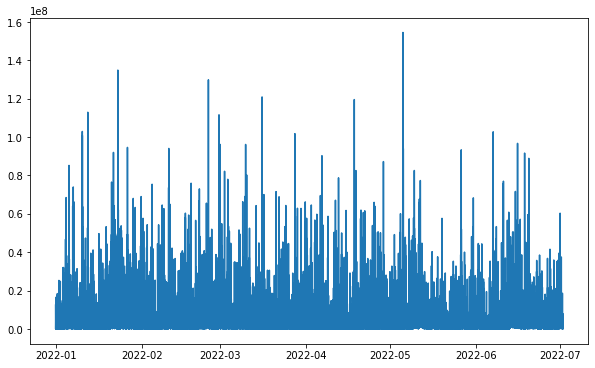

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(v)

Text(0, 0.5, 'volume')

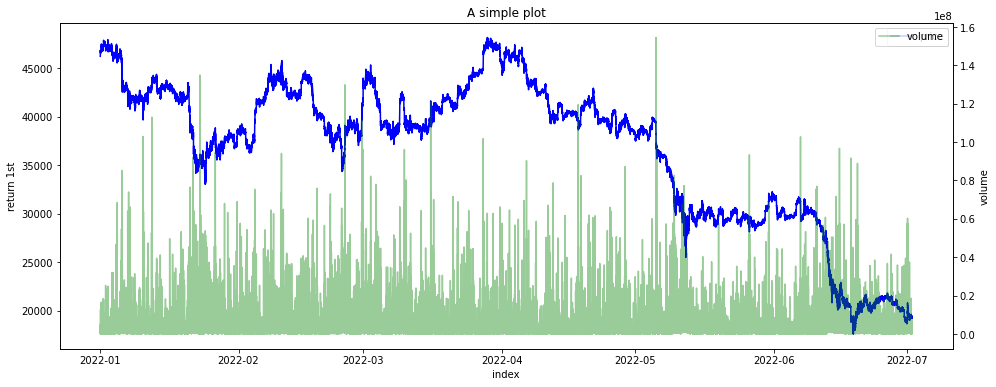

In [ ]:

fig,ax1 = plt.subplots(figsize = (16, 6))
ax1.plot(d['close'],'b',lw = 1.5,label = 'price')
ax1.legend(loc = "best") 
plt.xlabel('index')
plt.ylabel('return 1st')
plt.title('A simple plot')
ax2 = ax1.twinx()
ax2.plot(v,'g',lw = 1.5,label = 'volume', alpha = 0.4)
ax2.legend(loc = 0)
plt.ylabel('volume')


Back Testing

7/27 phase 1(without sellshort&buytocover)
1. when FR > 1 std => buy
2. when FR <0 => sell

In [ ]:
fund = 100 #初始有100元本金
money = 10 #每次投入10元
feeRate = 0.003
length = 70
stdTimes = 2.5
rule = '1H'

d1 = data.resample(rule=rule, closed='right', label='right').first()[['open']]
d2 = data.resample(rule=rule, closed='right', label='right').max()[['high']]
d3 = data.resample(rule=rule, closed='right', label='right').min()[['low']]
d4 = data.resample(rule=rule, closed='right', label='right').last()[['close']]
d5 = data.resample(rule=rule, closed='right', label='right').sum()[['volume']]
df = pd.concat([d1,d2,d3,d4,d5], axis=1)

funding['std'] = funding['rate'].rolling(window=length, center=False).std()

NameError: ignored

In [ ]:
test = df[1:]
df = test[:-2]
df

,open,high,low,close,volume
startTime,,,,,
2022-01-01 01:00:00+00:00,46247.0,46726.0,46221.0,46644.0,1.582628e+07
2022-01-01 02:00:00+00:00,46644.0,46936.0,46576.0,46813.0,1.079148e+07
2022-01-01 03:00:00+00:00,46813.0,46928.0,46728.0,46813.0,7.892345e+06
2022-01-01 04:00:00+00:00,46813.0,46899.0,46782.0,46838.0,5.060635e+06
2022-01-01 05:00:00+00:00,46838.0,46882.0,46617.0,46728.0,8.877429e+06
...,...,...,...,...,...
2022-07-21 20:00:00+00:00,22942.0,23205.0,22920.0,23197.0,2.913858e+07
2022-07-21 21:00:00+00:00,23197.0,23306.0,23097.0,23126.0,2.558973e+07
2022-07-21 22:00:00+00:00,23126.0,23249.0,23083.0,23180.0,1.002430e+07


In [ ]:
funding

,rate,std
time,,
2022-01-01 01:00:00+00:00,0.000017,NaN
2022-01-01 02:00:00+00:00,0.000008,NaN
2022-01-01 03:00:00+00:00,0.000010,NaN
2022-01-01 04:00:00+00:00,0.000007,NaN
2022-01-01 05:00:00+00:00,0.000007,NaN
...,...,...
2022-07-21 20:00:00+00:00,-0.000002,0.000005
2022-07-21 21:00:00+00:00,-0.000008,0.000005
2022-07-21 22:00:00+00:00,-0.000010,0.000005


In [ ]:
# 已實現損益

first = 0 ##除了第一筆之外，只紀錄出場的時間點
BS = None
buy = []
sell = []
# sellshort = []
# buytocover = []
profit_list = [0]
profit_fee_list = [0]

for i in range(len(df)):

    if i == len(df)-1:
        break

    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)
        
        if funding['rate'][i] > stdTimes * funding['std'][i]:
            tempSize = money / df['open'][i+1]
            BS = 'B'
            t = i+1
            buy.append(t)

        # elif df['close'][i] < df['ma'][i] - stdTimes*df['std'][i]:
        #     tempSize = money / df['open'][i+1]
        #     BS = 'S'
        #     t = i+1
        #     sellshort.append(t)
        
    elif BS == 'B':
        profit = tempSize * (df['open'][i+1] - df['open'][i])
        profit_list.append(profit)
            
        if funding['rate'][i] < 0:
            pl_round = tempSize * (df['open'][i+1] - df['open'][t])
            profit_fee = profit - money*feeRate - (money+pl_round)*feeRate
            profit_fee_list.append(profit_fee)
            sell.append(i+1)
            BS=None
        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)
            
    # elif BS == 'S': 
    #     profit = tempSize * (df['open'][i] - df['open'][i+1])
    #     profit_list.append(profit)
        
    #     if df['close'][i] >= df['ma'][i] or i == len(df)-2:
    #         pl_round = tempSize * (df['open'][t] - df['open'][i+1])
    #         profit_fee = profit - money*feeRate - (money+pl_round)*feeRate
    #         profit_fee_list.append(profit_fee)
    #         buytocover.append(i+1)
    #         BS=None
    #     else:
    #         profit_fee = profit
    #         profit_fee_list.append(profit_fee)
            
equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=df.index)
print(equity)

                             profit  profitfee
startTime                                     
2022-01-01 01:00:00+00:00  0.000000   0.000000
2022-01-01 02:00:00+00:00  0.000000   0.000000
2022-01-01 03:00:00+00:00  0.000000   0.000000
2022-01-01 04:00:00+00:00  0.000000   0.000000
2022-01-01 05:00:00+00:00  0.000000   0.000000
...                             ...        ...
2022-07-21 20:00:00+00:00 -5.430012  -7.873722
2022-07-21 21:00:00+00:00 -5.430012  -7.873722
2022-07-21 22:00:00+00:00 -5.430012  -7.873722
2022-07-21 23:00:00+00:00 -5.430012  -7.873722
2022-07-22 00:00:00+00:00 -5.430012  -7.873722

[4848 rows x 2 columns]


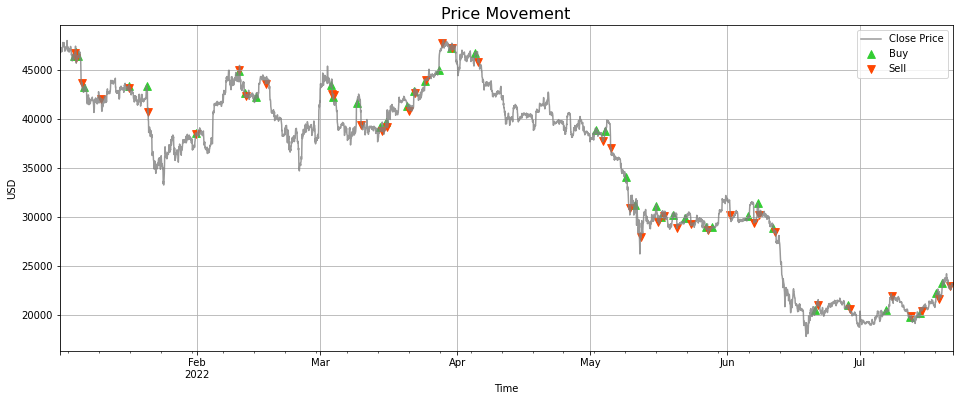

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))

df['close'].plot(label = 'Close Price', ax = ax, c = 'gray', grid=True, alpha=0.8)
plt.scatter(df['close'].iloc[buy].index, df['close'].iloc[buy],c = 'limegreen', label = 'Buy', marker='^', s=60)
plt.scatter(df['close'].iloc[sell].index, df['close'].iloc[sell],c = 'orangered', label = 'Sell', marker='v', s=60)
# plt.scatter(df['close'].iloc[sellshort].index, df['close'].iloc[sellshort],c = 'limegreen', label = 'Sellshort', marker='v', s=60)
# plt.scatter(df['close'].iloc[buytocover].index, df['close'].iloc[buytocover],c = 'limegreen', label = 'Buytocover', marker='^', s=60)

plt.legend()
plt.ylabel('USD')
plt.xlabel('Time')
plt.title('Price Movement',fontsize  = 16);

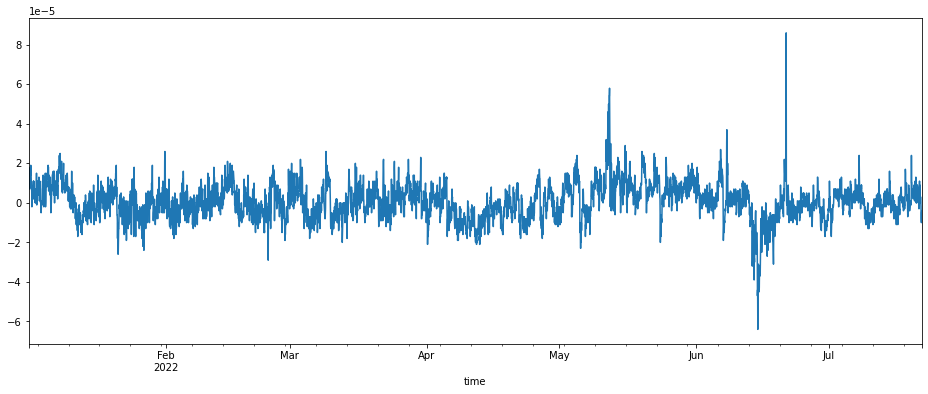

In [ ]:
funding['rate'].plot(figsize = (16, 6))

## Opt

In [ ]:
data = pd.read_csv(path+'/BTC_USD.csv', parse_dates=True, index_col='startTime')
funding = pd.read_csv(path+'/BTC_funding.csv', parse_dates=True, index_col='time')

In [ ]:
df_inSample = data.loc[:'2022-05']
df_outOfSample = data.loc['2022-06':]

In [ ]:
# optimize length, std times

optimizationList = []

fund = 100 #初始有100元本金
money = 10 #每次投入10元
feeRate = 0.003
rule = '1H'

d1 = df_inSample.resample(rule=rule, closed='right', label='right').first()[['open']]
d2 = df_inSample.resample(rule=rule, closed='right', label='right').max()[['high']]
d3 = df_inSample.resample(rule=rule, closed='right', label='right').min()[['low']]
d4 = df_inSample.resample(rule=rule, closed='right', label='right').last()[['close']]
d5 = df_inSample.resample(rule=rule, closed='right', label='right').sum()[['volume']]
df = pd.concat([d1,d2,d3,d4,d5], axis=1)

for length in range(10, 110, 10):
  for stdTimes in np.arange(0.5, 3, 0.5):

    stdTimes = np.round(stdTimes, 1)

    print('--------')
    print(f'length: {length}')
    print(f'stdTimes: {stdTimes}')

    funding['std'] = funding['rate'].rolling(window = length, center = False).std()

    first = 0 ##除了第一筆之外，只紀錄出場的時間點

    BS = None
    buy = []
    sell = []
    # sellshort = []
    # buytocover = []
    profit_list = [0]
    profit_fee_list = [0]

    for i in range(len(df)):

        if i == len(df)-1:
            break

        if BS == None:
            profit_list.append(0)
            profit_fee_list.append(0)
            
            if funding['rate'][i] > 0 and funding['rate'][i] > stdTimes * funding['std'][i]:
                tempSize = money / df['open'][i+1]
                BS = 'B'
                t = i+1
                buy.append(t)

            # elif df['close'][i] < df['ma'][i] - stdTimes*df['std'][i]:
            #     tempSize = money / df['open'][i+1]
            #     BS = 'S'
            #     t = i+1
            #     sellshort.append(t)
            
        elif BS == 'B':
            profit = tempSize * (df['open'][i+1] - df['open'][i])
            profit_list.append(profit)
                
            if funding['rate'][i] < 0:
                pl_round = tempSize * (df['open'][i+1] - df['open'][t])
                profit_fee = profit - money*feeRate - (money+pl_round)*feeRate
                profit_fee_list.append(profit_fee)
                sell.append(i+1)
                BS=None
            else:
                profit_fee = profit
                profit_fee_list.append(profit_fee)
                
    # elif BS == 'S': 
    #     profit = tempSize * (df['open'][i] - df['open'][i+1])
    #     profit_list.append(profit)
        
    #     if df['close'][i] >= df['ma'][i] or i == len(df)-2:
    #         pl_round = tempSize * (df['open'][t] - df['open'][i+1])
    #         profit_fee = profit - money*feeRate - (money+pl_round)*feeRate
    #         profit_fee_list.append(profit_fee)
    #         buytocover.append(i+1)
    #         BS=None
    #     else:
    #         profit_fee = profit
    #         profit_fee_list.append(profit_fee)
    
    
    equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=df.index)
    equity['equity'] = equity['profitfee'] + fund
    equity['drawdown_percent'] = (equity['equity'] / equity['equity'].cummax()) - 1
    equity['drawdown'] = equity['equity'] - equity['equity'].cummax()
    ret = equity['equity'][-1]/equity['equity'][0] - 1
    mdd = abs(equity['drawdown_percent'].min())
    calmarRatio = ret / mdd     
  
    optimizationList.append([length, stdTimes, ret, calmarRatio])

--------
length: 10
stdTimes: 0.5
--------
length: 10
stdTimes: 1.0
--------
length: 10
stdTimes: 1.5
--------
length: 10
stdTimes: 2.0
--------
length: 10
stdTimes: 2.5
--------
length: 20
stdTimes: 0.5
--------
length: 20
stdTimes: 1.0
--------
length: 20
stdTimes: 1.5
--------
length: 20
stdTimes: 2.0
--------
length: 20
stdTimes: 2.5
--------
length: 30
stdTimes: 0.5
--------
length: 30
stdTimes: 1.0
--------
length: 30
stdTimes: 1.5
--------
length: 30
stdTimes: 2.0
--------
length: 30
stdTimes: 2.5
--------
length: 40
stdTimes: 0.5
--------
length: 40
stdTimes: 1.0
--------
length: 40
stdTimes: 1.5
--------
length: 40
stdTimes: 2.0
--------
length: 40
stdTimes: 2.5
--------
length: 50
stdTimes: 0.5
--------
length: 50
stdTimes: 1.0
--------
length: 50
stdTimes: 1.5
--------
length: 50
stdTimes: 2.0
--------
length: 50
stdTimes: 2.5
--------
length: 60
stdTimes: 0.5
--------
length: 60
stdTimes: 1.0
--------
length: 60
stdTimes: 1.5
--------
length: 60
stdTimes: 2.0
--------
lengt

In [ ]:
optResult = pd.DataFrame(optimizationList, columns=['length','stdTimes','ret','calmarRatio'])
optResult.sort_values('ret', ascending=False).iloc[:5]

,length,stdTimes,ret,calmarRatio
49,100,2.5,-0.020265,-0.645567
44,90,2.5,-0.022008,-0.676524
39,80,2.5,-0.022613,-0.673642
24,50,2.5,-0.027963,-0.720610
48,100,2.0,-0.031590,-0.727278


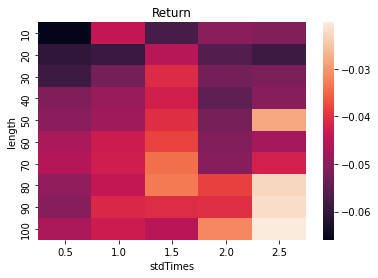

In [ ]:
import seaborn as sns

pic = optResult.pivot('length', 'stdTimes', 'ret')
sns.heatmap(data = pic).set(title='Return');

Out of sample

In [ ]:
fund = 100 #初始有100元本金
money = 10 #每次投入10元
feeRate = 0.003
length = 100
stdTimes = 2.5
rule = '1H'

d1 = df_outOfSample.resample(rule=rule, closed='right', label='right').first()[['open']]
d2 = df_outOfSample.resample(rule=rule, closed='right', label='right').max()[['high']]
d3 = df_outOfSample.resample(rule=rule, closed='right', label='right').min()[['low']]
d4 = df_outOfSample.resample(rule=rule, closed='right', label='right').last()[['close']]
d5 = df_outOfSample.resample(rule=rule, closed='right', label='right').sum()[['volume']]
df = pd.concat([d1,d2,d3,d4,d5], axis=1)

funding['std'] = funding['rate'].rolling(window=length, center=False).std()

In [ ]:
# 已實現損益

first = 0 ##除了第一筆之外，只紀錄出場的時間點
BS = None
buy = []
sell = []
# sellshort = []
# buytocover = []
profit_list = [0]
profit_fee_list = [0]

for i in range(len(df)):

    if i == len(df)-1:
        break

    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)
        
        if funding['rate'][i] > 0 and funding['rate'][i] > stdTimes * funding['std'][i]:
            tempSize = money / df['open'][i+1]
            BS = 'B'
            t = i+1
            buy.append(t)

        # elif df['close'][i] < df['ma'][i] - stdTimes*df['std'][i]:
        #     tempSize = money / df['open'][i+1]
        #     BS = 'S'
        #     t = i+1
        #     sellshort.append(t)
        
    elif BS == 'B':
        profit = tempSize * (df['open'][i+1] - df['open'][i])
        profit_list.append(profit)
            
        if funding['rate'][i] < 0:
            pl_round = tempSize * (df['open'][i+1] - df['open'][t])
            profit_fee = profit - money*feeRate - (money+pl_round)*feeRate
            profit_fee_list.append(profit_fee)
            sell.append(i+1)
            BS=None
        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)
            
    # elif BS == 'S': 
    #     profit = tempSize * (df['open'][i] - df['open'][i+1])
    #     profit_list.append(profit)
        
    #     if df['close'][i] >= df['ma'][i] or i == len(df)-2:
    #         pl_round = tempSize * (df['open'][t] - df['open'][i+1])
    #         profit_fee = profit - money*feeRate - (money+pl_round)*feeRate
    #         profit_fee_list.append(profit_fee)
    #         buytocover.append(i+1)
    #         BS=None
    #     else:
    #         profit_fee = profit
    #         profit_fee_list.append(profit_fee)
            
equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=df.index)
print(equity)

                             profit  profitfee
startTime                                     
2022-06-01 00:00:00+00:00  0.000000   0.000000
2022-06-01 01:00:00+00:00  0.000000   0.000000
2022-06-01 02:00:00+00:00  0.000000   0.000000
2022-06-01 03:00:00+00:00  0.000000   0.000000
2022-06-01 04:00:00+00:00  0.000000   0.000000
...                             ...        ...
2022-07-21 22:00:00+00:00 -0.320906  -0.859943
2022-07-21 23:00:00+00:00 -0.320906  -0.859943
2022-07-22 00:00:00+00:00 -0.320906  -0.859943
2022-07-22 01:00:00+00:00 -0.320906  -0.859943
2022-07-22 02:00:00+00:00 -0.320906  -0.859943

[1227 rows x 2 columns]


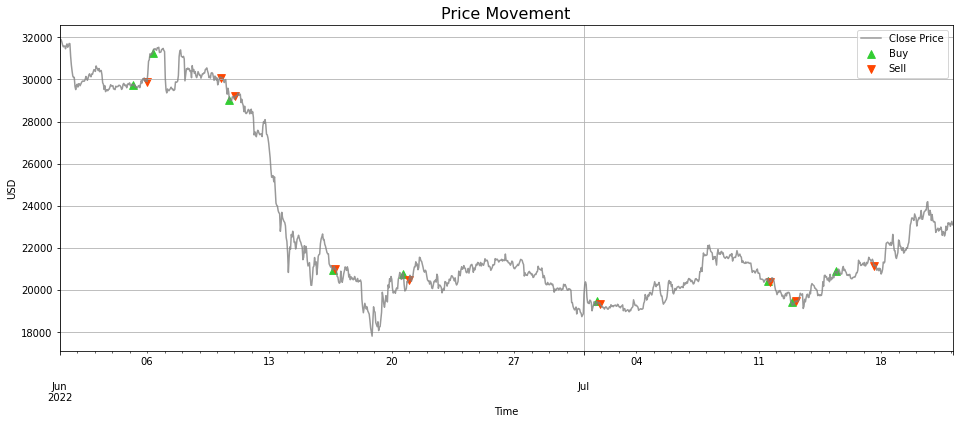

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))

df['close'].plot(label = 'Close Price', ax = ax, c = 'gray', grid=True, alpha=0.8)
plt.scatter(df['close'].iloc[buy].index, df['close'].iloc[buy],c = 'limegreen', label = 'Buy', marker='^', s=60)
plt.scatter(df['close'].iloc[sell].index, df['close'].iloc[sell],c = 'orangered', label = 'Sell', marker='v', s=60)
# plt.scatter(df['close'].iloc[sellshort].index, df['close'].iloc[sellshort],c = 'limegreen', label = 'Sellshort', marker='v', s=60)
# plt.scatter(df['close'].iloc[buytocover].index, df['close'].iloc[buytocover],c = 'limegreen', label = 'Buytocover', marker='^', s=60)

plt.legend()
plt.ylabel('USD')
plt.xlabel('Time')
plt.title('Price Movement',fontsize  = 16);